In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#Reading the fact_bookings table for AtliQ Grands.

df_bookings=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\fact_bookings.csv')
print(df_bookings.head(4))


         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2  May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3  May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   

   revenue_generated  revenue_realized  
0              10010             10010  
1               9100              3640  
2            9100000              9100  
3               9100              3640  


In [3]:
#Basic data explorations:
print(df_bookings.shape)
print(df_bookings.room_category.unique())
print(df_bookings.booking_platform.unique())

(134590, 12)
['RT1' 'RT2' 'RT3' 'RT4']
['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']


In [4]:
#Count of bookings in each platform:
platformwise_count=df_bookings.booking_platform.value_counts()
print(platformwise_count)

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


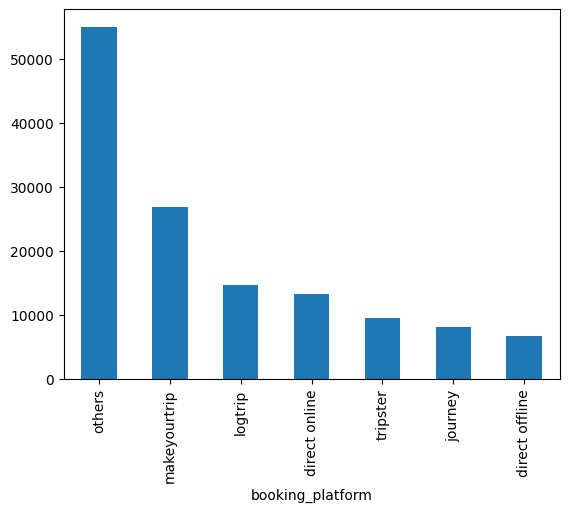

In [6]:
#Plotting the platformwise count as a verical bar chart:
platformwise_count=df_bookings.booking_platform.value_counts().plot(kind='bar')
print(platformwise_count)


Axes(0.125,0.11;0.775x0.77)


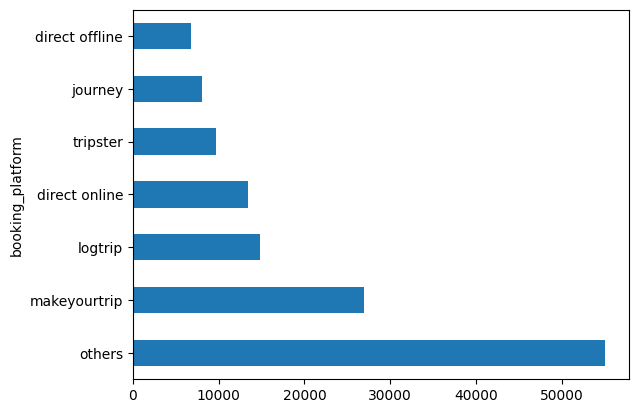

In [7]:
#Plotting the platformwise count as a horizontal bar chart:
platformwise_count=df_bookings.booking_platform.value_counts().plot(kind='barh')
print(platformwise_count)

In [8]:
#Quick statistics of the numeric columns of the table:
column_descriptions=df_bookings.describe()
print(column_descriptions)
#-17 guests are not possible,data error,we will do data cleaning later.

         property_id      no_guests  ratings_given  revenue_generated  \
count  134590.000000  134587.000000   56683.000000       1.345900e+05   
mean    18061.113493       2.036170       3.619004       1.537805e+04   
std      1093.055847       1.034885       1.235009       9.303604e+04   
min     16558.000000     -17.000000       1.000000       6.500000e+03   
25%     17558.000000       1.000000       3.000000       9.900000e+03   
50%     17564.000000       2.000000       4.000000       1.350000e+04   
75%     18563.000000       2.000000       5.000000       1.800000e+04   
max     19563.000000       6.000000       5.000000       2.856000e+07   

       revenue_realized  
count     134590.000000  
mean       12696.123256  
std         6928.108124  
min         2600.000000  
25%         7600.000000  
50%        11700.000000  
75%        15300.000000  
max        45220.000000  


In [9]:
#Finding minimum and maximum revenue generated:
max_revenue=df_bookings.revenue_generated.max()
min_revenue=df_bookings.revenue_generated.min()
print(max_revenue)
print(min_revenue)

#Again 28560000 is a data error we will clean later.

28560000
6500


In [41]:
#Lets explore other tables now:
df_bookings=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_date.csv')
print(df_bookings.head(4))
df_hotels=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_hotels.csv')
print(df_hotels.head(4))
df_rooms=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\dim_rooms.csv')
print(df_rooms.head(4))
df_aggregated_bookings=pd.read_csv('D:\\21.CODEBASICS\\BOOTCAMP\\Python\\PyCharm-Learn Python\\1-CODEBASICS\\PYTHON-HOTEL DATA ANALYTICS PROJECT\\datasets\\fact_aggregated_bookings.csv')
print(df_aggregated_bookings.head(4))

        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential
   property_id check_in_date room_category  successful_bookings  capacity
0        16559      1-May-22           RT1                   25      30.0
1        19562      1-May-22           RT1                   28      30.0
2        19563      1-May-22           RT1                   23      30.0
3        17558      1-May-22           RT1                   30      19.0


In [13]:
#Additional data inspections on the tables:
df_hotels.head(4)


,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [42]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [16]:
#How many hotels are there in each city?
city=df_hotels.city.value_counts().sort_values()
print(city)

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64


Text(0.5, 1.0, 'City Count Distribution')

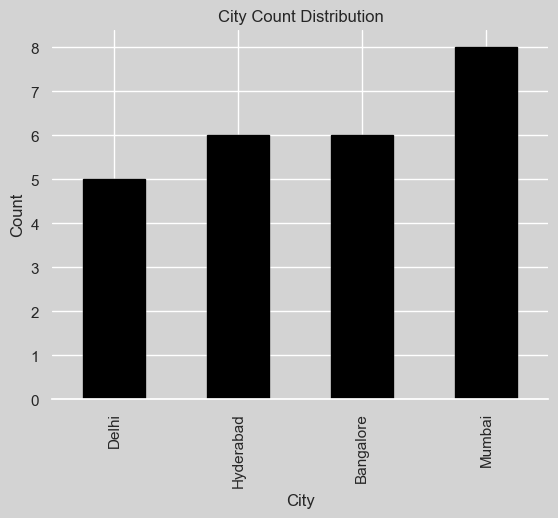

In [53]:
#Plotting a bar chart for the cities:
import seaborn as sns
df_hotels.city.value_counts().sort_values().plot(kind='bar',color='black')
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a bar plot using Matplotlib
city_chart = df_hotels.city.value_counts().sort_values().plot(kind='bar', color='black', edgecolor='black')

# Set the background color of the entire figure using Seaborn
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightgrey'})

# Customize the plot further with Seaborn functions
sns.despine(left=True)  # Remove the left spine

# Add labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Count Distribution')


